In [8]:
import keras
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist

In [15]:
X, y = make_moons(n_samples = 1000, noise = 0.2)

In [16]:
X.shape

(1000, 2)

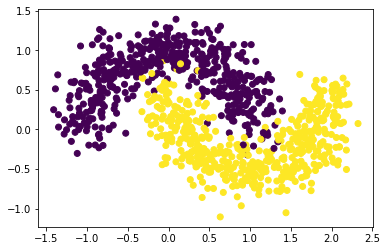

In [17]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [35]:
mu = X.mean(axis= 0)
sig = X.std(axis=0)

X = (X-mu)/sig

# Deep Learning Model

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()

In [38]:
model.add(  Dense(units=64, activation='relu', input_shape = (2,) ) )
model.add(  Dense(units=32, activation='relu' ))
model.add(  Dense(units=10, activation='relu' ))
model.add(  Dense(units=1 , activation='sigmoid' ))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 2,613
Trainable params: 2,613
Non-trainable params: 0
_________________________________________________________________


In [40]:
# model compile karna hai
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'] )

In [41]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split?

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
his = model.fit(x=X_train, y= y_train, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 1s 9ms/step - loss: 0.6667 - accuracy: 0.6863 - val_loss: 0.5714 - val_accuracy: 0.8375
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.8777 - val_loss: 0.4388 - val_accuracy: 0.8375
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8671 - val_loss: 0.3406 - val_accuracy: 0.8375
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8750 - val_loss: 0.3151 - val_accuracy: 0.8750
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2654 - accuracy: 0.8920 - val_loss: 0.3024 - val_accuracy: 0.8875
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.8974 - val_loss: 0.2887 - val_accuracy: 0.8875
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.8881 - val_loss: 0.2712 - val_accuracy: 0.8875
Epoch 8/50
23/23 [==

In [44]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9737


[0.06793579459190369, 0.9737499952316284]

In [45]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9750


[0.05972148850560188, 0.9750000238418579]

In [48]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
